# Statistics and Probability: Fundamentals

---



This notebook is designed to introduce the fundamental concepts of statistics and probability. We'll move from basic definitions to more complex topics like probability distributions and their applications in machine learning, all with clear explanations and hands-on code examples.

# Core Libraries

We'll be using the following libraries for our analysis and visualizations:
* numpy for numerical operations.
* pandas for data manipulation.
* matplotlib and seaborn for plotting.
* plotly for interactive plots.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import plotly.graph_objects as pg
import plotly.express as px

# What is Probability?

At its core, probability is the science of uncertainty. It's a way to measure how likely something is to happen. We use it every day, whether we're checking a weather forecast that predicts a 30% chance of rain or deciding if we should play a game with certain odds.

To study probability formally, we need a few key terms. Let's break them down.

## Definitions

In nature as in Compute Science, one of several events can be predicted to occur, but we do not know exactly which of them will occur. The supposition is that they will occur with different frequencies, and we know those frequency. So each time we run the experiment, we call is a **sample**.

### Key Terminology

- **Experiment:**  
  An action or process with an uncertain outcome.  
  *Example:* Tossing a coin.  

- **Sample Space:**  
  The set of all possible outcomes of an experiment.  
  *Example:* For a coin toss, the sample space is `{Heads, Tails}`.  

- **Event:**  
  A specific outcome or a set of outcomes we are interested in.  
  *Example:* The event of "getting Heads".  

- **Sample:**  
  A single result from one run of an experiment.  
  *Example:* The coin lands on Tails. This is one sample.  



The thing that we are computing the probability of is typically a boolean condition.
* Whether or not the sample belongs to a set: Does a integer sampled randomly belong to the set of natural numbers?
* Any set of boolean conditions on that set: Is an integer samples randomly prime, and it's either greater than 100 or less than 50.
* By membership in a continuous set: Is the speed of the car in the range 60 to 80.8 km per hour.

Given this boolean formulation, we can construct a set of elements which we are computing the probability of. We will call these favorable samples.

$$P = \frac{\text{number of favorable samples}}{\text{number of samples}}$$

For now assume that all samples in our set of all possibilities (i.e. sample space) are equally likely. This need not be true, the samples can themselves be chosen from some probability distribution, a proposition which we will encounter when we study conditional probability.

In [4]:
def toss_coin(number_of_tosses=100):
    return pd.Series(np.random.choice(['Heads', 'Tails'], number_of_tosses))

def throw_dice(number_of_tosses=100):
    return pd.Series(np.random.randint(1, 6+1, number_of_tosses))

In [5]:
results = throw_dice(500)
print(results.value_counts())
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

4    99
6    94
1    81
5    80
2    80
3    66
Name: count, dtype: int64


# Theoretical vs. Experimental Probability

Notice the result above:  
We got **41 Heads** and **59 Tails**.  

- **Experimental Probability (Heads):**  
  $$
  \frac{41}{100} = 0.41
  $$

- **Theoretical Probability (Heads):**  
  $$
  \frac{1}{2} = 0.5
  $$

**Why are they different?**  
Because of *randomness*. In a small number of trials, the results can deviate from the theoretical expectation.  

➡️ As we run more and more trials, the **experimental probability** will get closer and closer to the **theoretical probability**.


## Derived Probability Distributions

Given the simple fact that each toss will be heads or tails (also called a bernoulli distribution) we can come up with a derived question, that given 20 coin tosses, what is the probability that 7 of them are heads.

### From Single Events to Multiple Events
Now, let's ask a more complex question. Instead of looking at a single coin toss, what if we toss a coin 20 times? We're no longer interested in just "Heads or Tails", but in "**How many Heads did we get in 20 tosses?**"

When we look at the outcomes of a series of experiments like this, we are looking at a **derived probability distribution**. The specific distribution that models the number of "successes" (e.g., Heads) in a fixed number of trials is called the **Binomial Distribution**.

You can see the probability distribution below, it's called a Binomial distribution and looks like a Bell. This will always happen whenever you have a bunch of independently sampled variables. (Independent and Identical, see Central Limit Theorem)

In [6]:
results = pd.Series([np.sum(toss_coin(10) == 'Heads') for _ in range(1000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

Let's try to see if we toss the coin 500 times, then what happens. Looks similar, and more like a bell than before.

In [7]:
results = pd.Series([np.sum(toss_coin(200) == 'Heads') for _ in range(5000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

### The Bell Curve Emerges

The bell-shaped curve you see in the plots is one of the most important shapes in statistics: the Normal Distribution.

The simulation shows that the most likely outcome for 20 tosses is 10 heads, and for 500 tosses is 250 heads. Outcomes far from this average are much less likely. This tendency for repeated, independent experiments to result in a bell-shaped curve is explained by the Central Limit Theorem, a powerful idea we'll touch upon later.

## How much to Sample

It's hard to estimate the probability of real world events experimentally. Like what is the probability of rolling a dice and getting a 2. Well, it's 1/6, easy to see theoretically. Often it won't be, in which case we need to see from experiments what the answer is.

### The Law of Large Numbers
The key idea here is called the **Law of Large Numbers**. This fundamental theorem of probability states that as you perform an experiment more and more times, the average of the results will get closer and closer to the true, theoretical expected value.

In the dice roll example below, the theoretical probability of rolling any number is 1/6 (approx 0.167). Watch how the bars representing the experimental probabilities get closer to the red line as the number of throws increases.

We have the 1/6 theoretical result as a Red line. The probability of getting each number from 1 to 6 is shown, but the different colors represent the different number of experiments it was sampled from. Blue was estimated using 10 experiments, Red using 100, Green with a 1000, Purple with 10000, and Orange with 100000. You can see that as we get more samples, the correctness and the reliability of that correctness increases.

You can also see, that if we took 100 samples, and we have a value far away from 1/6, taking more samples will take us back to 1/6 in time. This phenomenon is called **Regression to the Mean** and you can hear more about it in the following Veritasium videos.

In [12]:
results = {shots: throw_dice(10000) for shots in [1,7,2]}
fig = pg.Figure([pg.Bar(x=result.value_counts().keys(),
                        y=result.value_counts().values / 10000,name=f'{shots} rolls')
                    for shots, result in results.items()])
theoretical = {2:1/36,3:2/36,4:3/36,5:4/36,6:5/36,7:6/36,8:5/36,9:4/36,10:3/36,11:2/36,12:1/36}
for s,p in theoretical.items():
  fig.add_shape(type='line', x0=s-0.4, y0=p, x1=s+0.4, y1=p, line=dict(color='Green',))
fig.show()

## Traps of Statistics in the Real world

Vertiasium and 3Blue1Brown are some of the best instructors in taking phenomena in the real world and taking them apart in the language of mathematics, analyzing how good and correct are the solutions we pose to them. Following couple of videos are excellent demonstrators of how we apply probability in the real world, and how the entire world might often misapply it, or atleast misinterpret or partially interpret what the math is saying. Do take a look.

* Veritasium: Is most published research wrong? https://youtu.be/42QuXLucH3Q
* Veritasium: How we're fooled by statistics https://youtu.be/1tSqSMOyNFE

## Try to solve for these

1. If you have a shuffled deck of 52 cards, there are 4 aces, 4 kings, 4 queeens, 4 jacks, and 4 of each numbered card from 2 to 10. What is the probability that if you draw a card at random it will be a numbered card.

2. In the same setup as above, you take on card out and look at it, put it back into the deck and shuffle it. Now you pull another card output. What is the probability that both the cards you pulled out are numbered cards.

3. Same Problem as above, but now when you pull out one card, you throw it out and do not put it back into the deck. Find the probability now that they are both numbered cards that you drew.

4. Now the deck of card is not shuffled. All the cards are in sorted order, first all the cards from Ace to King of Spades, then Hearts, then Diamonds and then Clubs. You are asked to cut the deck (break it into 2 parts, i.e. pick some cards from the top) at a random location. What is the probability that the bottom card of your cut is an numbered cards card.

# Solutions to the Card Problems

Let's work through the solutions step by step.

---

### Step 1: Identify the cards
- **Face cards:** Ace, King, Queen, Jack → $4 \times 4 = 16$  
- **Numbered cards:** $2,3,4,5,6,7,8,9,10$ → $9 \times 4 = 36$  
- **Total cards:** $16 + 36 = 52$  

---

### 1. Probability of drawing a numbered card  

$$
P(\text{Numbered}) = \frac{\text{Number of numbered cards}}{\text{Total cards}}
= \frac{36}{52} = \frac{9}{13} \approx 0.692
$$

---

### 2. Drawing two numbered cards **with replacement**  

Since the card is put back, the two draws are **independent**:

$$
P(\text{1st Num AND 2nd Num}) = P(\text{1st Num}) \times P(\text{2nd Num})
$$

$$
= \frac{36}{52} \times \frac{36}{52}
= \frac{9}{13} \times \frac{9}{13}
= \frac{81}{169} \approx 0.479
$$

---

### 3. Drawing two numbered cards **without replacement**  

These events are **dependent**:

- First draw:  
$$
P(\text{1st Num}) = \frac{36}{52}
$$

- Second draw (given first was numbered):  
$$
P(\text{2nd Num} \mid \text{1st Num}) = \frac{35}{51}
$$

- Combined:  
$$
P(\text{Both Num}) = \frac{36}{52} \times \frac{35}{51}
= \frac{1260}{2652} = \frac{105}{221} \approx 0.475
$$

---

### 4. Cutting a sorted deck  

This is a trick question!  
Cutting at a random location is the same as picking **one random card** out of 52.  
The deck being sorted does not matter.

$$
P(\text{Bottom card of cut is Num}) = \frac{36}{52} = \frac{9}{13}
$$

---


## Fundamentals of Probability

For your reference, the rules of probability are reproduced as follows:
1. The probability of an event A is between 0 and 1 (inclusive): $0 \leq p(A)\leq 1$
2. The sum of the probability of all possible events (the *sample space*) is 1. $\Sigma^n_{i=0} p(A_i)=1$
3. The sum of the probability of an event and its complement is 1. $p(A^C)+p(A) = 1$
4. (Addition Rule) The probability of event A *or* event B happening is equal to the sum of the probabilities of event A and event B happening respectively, *less* the probability of event A **and** event B. $p(A \cup B)= p(A) + p(B) - p(AB)$
5. (Multiplicative Rule) If events A and B are independent, then the probability of event A and B jointly occuring is the product of the probabilities of events A and B respectively. $p(AB) = p(A)p(B)$

<div class="alert alert-info">
📝 <b>Note:</b> Events A and B are independent if the occurence of event A doesn't change the likelihood of Event B occuring. Do not confuse this with <b>mutually exclusive</b> events. If events A and B are mutually exclusive (disjoint), they cannot both happen.
</div>

# What is Expectation?

# The "Average" Outcome

In probability, the **Expected Value (Expectation)** represents the long-term average outcome of an experiment if you were to repeat it many, many times.  

It is calculated as a **weighted average** of all possible values, where the weights are the probabilities of each value occurring.

---

### Example: Expected value of a fair six-sided die

- Possible outcomes: $\{1, 2, 3, 4, 5, 6\}$  
- Probability of each outcome: $\tfrac{1}{6}$  

$$
E = (1 \times \tfrac{1}{6}) + (2 \times \tfrac{1}{6}) + (3 \times \tfrac{1}{6}) + (4 \times \tfrac{1}{6}) + (5 \times \tfrac{1}{6}) + (6 \times \tfrac{1}{6})
$$

$$
E = \frac{1+2+3+4+5+6}{6} = \frac{21}{6} = 3.5
$$

---

⚠️ This does **not** mean you will ever roll a *3.5*!  
It means that if you rolled the die thousands of times and averaged the results, the average would be very close to **3.5**.


In any set of possible events, we can compute the probability of each of those events. We saw that all events can happen with probability of 1/6. Or sometimes, you can have one event with probability 1/6 and another with 5/6.

Now what if each of these outcomes was associated with a quantity. For eg. if you toss a coin and it's heads, you get Rs. 5. If it's tails, you lose Rs. 2. Will you play this game the coin is fair?

Of course you will. Because you feel that on average you will get $\frac{5 - 2}{2} = 1.5$ rupees as your winnings per round.

But what if the coin is biased. It comes heads $\frac{1}{6}$ of the time and $\frac{5}{6}$ of the time it's tails. Now you might not be sure, so let's try to take the weighted average.

$$E = \frac{1}{6} \times 5 - \frac{5}{6} 2 = \frac{5 - 10}{6} = -\frac{5}{6}$$, so you are losing slightly less than a rupee every round, not a favorable game to play. This value, the weighted sum of the "value" of each outcome is called the expectation. Mathematically:

$$E = \sum_{i \in S} P_i V_i$$

Where S is the sample space, $P_i$ is the probability of the sample, and $V_i$ is the value associated with the sample. $i$ is each possible sample in the sample space.

## Simulating to compute Expectation

Let's test your basic coding skills:

> You have a suffled deck of 52 cards, 4 of which are aces. You are to draw cards one by one and throw them out. As soon as you see an ace you stop. How many non-ace cards did you throw out?

Whether or not you can solve this mathematically, try computing this numerically, that is by simulation in code.

**Do not look at the solution given below.**


In [16]:
def number_of_numbered_cards_drawn_before_ace(trials=100, show_trials=10):
    values = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
    ranks = ['H', 'D', 'C', 'S']

    cards_thrown_counts = []
    for experiment in range(trials):
        deck_of_cards = [value + rank for value in values for rank in ranks]
        cards_thrown = 0
        cards_pile = []
        while len(deck_of_cards) > 0:
            picked_card = np.random.choice(deck_of_cards)
            cards_pile.append(picked_card)
            if picked_card[0] == 'A':
                break
            cards_thrown += 1
            deck_of_cards.remove(picked_card)
        if experiment < show_trials:
            print(cards_thrown, 'cards were thrown:', ' '.join(cards_pile))
        cards_thrown_counts.append(cards_thrown)

    return np.mean(cards_thrown_counts), cards_thrown_counts

expected_cards_thrown, cards_thrown_counts = number_of_numbered_cards_drawn_before_ace(10000)
print(f'\n{expected_cards_thrown} cards are tossed before we see the first ace!')

22 cards were thrown: QS KS 2C 8S 7H 8H 7S 9S 2S QC 9C 6S QD 2H 3D 7D 8C 3S 3H JC 8D 10H AC
2 cards were thrown: 7S 3D AD
4 cards were thrown: JC KH 5C 4S AC
17 cards were thrown: QD 2H JD 6C KC 7D 7S 6D 5D JH KS 9C 10D JC 4S JS KH AH
0 cards were thrown: AS
22 cards were thrown: 4H JH 2H 3D KH 3S 3C 6D QH 9C 5S 6H 3H 10C 8C 4D 2C KD 7C KC 9S 4C AH
15 cards were thrown: QH QD JD 8D QC 9H 3H 6S 3S 10S 2H JS JC 5C 5H AD
10 cards were thrown: 2S 7C KS 8D 4D 4H 9D 10H 8C 7S AD
1 cards were thrown: 8C AC
17 cards were thrown: 10D 2S 3C 2H 10S 9C 9D 5S KS 8C 2D 7S QH 5H 8S 6D 7H AC

9.6289 cards are tossed before we see the first ace!


## Visualize the Underlying Probability Mass Function

If you guess mathematically, you will guess that almost 1/13 cards are aces, so about 12 can be met on average before you see your first ace. And you won't be totally wrong.

Of course the percentage of aces increases as you keep throwing away the cards, so the actual expectation is not that.

Let's see the probability distribution for it!

In [17]:
results = pd.Series(cards_thrown_counts)
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

## A new trick - Technique of Contributions (Optional)

The correct way to solve for this is not particularly relevant for this course. However, if you are interested, it's called the **Technique of Contributions**.

You can say that if there was only 1 non-ace card, and 4 aces in the deck, the number of cards thrown would be $\frac{1}{5}$, since if and only if the numbered card is the first one you pick do you throw away a card, otherwise it's 0. So the card contributes $\frac{1}{5}$ to the answer, which it does if it's picked before any of the 4 aces.

Now each of the cards are non-interacting, and there are $48$ non-ace cards, so our answer would be $\frac{48}{5} = 9.6$

This is exactly what we simulated.

# Measurements and Errors

## Using Mean Squared Error

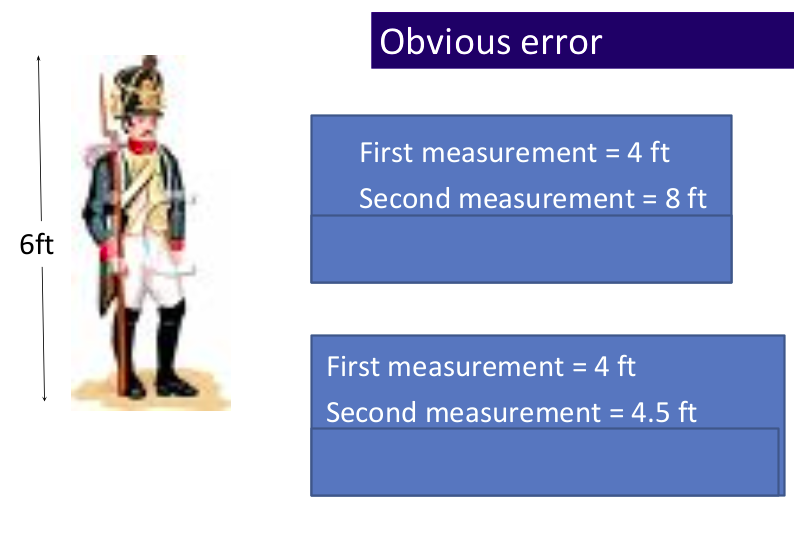

# Why Square the Error?

In data science and machine learning, we constantly need to measure how well our model's predictions match the actual truth.  
A common way to do this is by calculating an **error** or **loss**.

---

### But how should we penalize errors?

Let's assume the true height is **6 feet**:

- An error of **2 feet** (like predicting 4 or 8) is **bad**.  
- An error of **4 feet** (like predicting 10) is **much worse**.  

---

### Squaring the error

By squaring the error, we **penalize large mistakes much more** than small ones:

- Error of $2$:  
$$ 2^2 = 4 $$

- Error of $4$:  
$$ 4^2 = 16 $$

So the penalty grows **exponentially** with larger errors.

---

### Why this matters

This forces our model to be very careful about making wildly incorrect predictions.  

✅ This is the core idea behind the **Mean Squared Error (MSE)** loss function, which is fundamental to many regression algorithms.


Suppose you are measuring the height of a person. You have several students, each of whom take 2 readings.

* Student 1: 4 feet and 8 feet.
* Student 2: 4 feet and 4.5 feet.
* Student 3: 6 feet and 6 feet
* Student 4: 6 feet and 10 feet

How will you rate these students?

My estimate is that would would want to rank them as:
* Student 3
* Student 2
* Student 1
* Student 4

This is because 3 is correct.
2 is wrong, but he made a 2 foot and a 1.5 foot error.
1 is worse, **even though his average is correct**, he messed up by 2 feet each time, so he should be penalized for his 2 feet errors and not let the 2 errors cancel each other out (we need absolute value of errors or square of errors to do this).
4 is the worst, he has a bizzare 4 foot error. He got to 6 foot once, but that's just by chance, while others mess in 2 feet, his is messing up in 4 feet and is the least reliable. This shows that **outliers should be penalized more**.

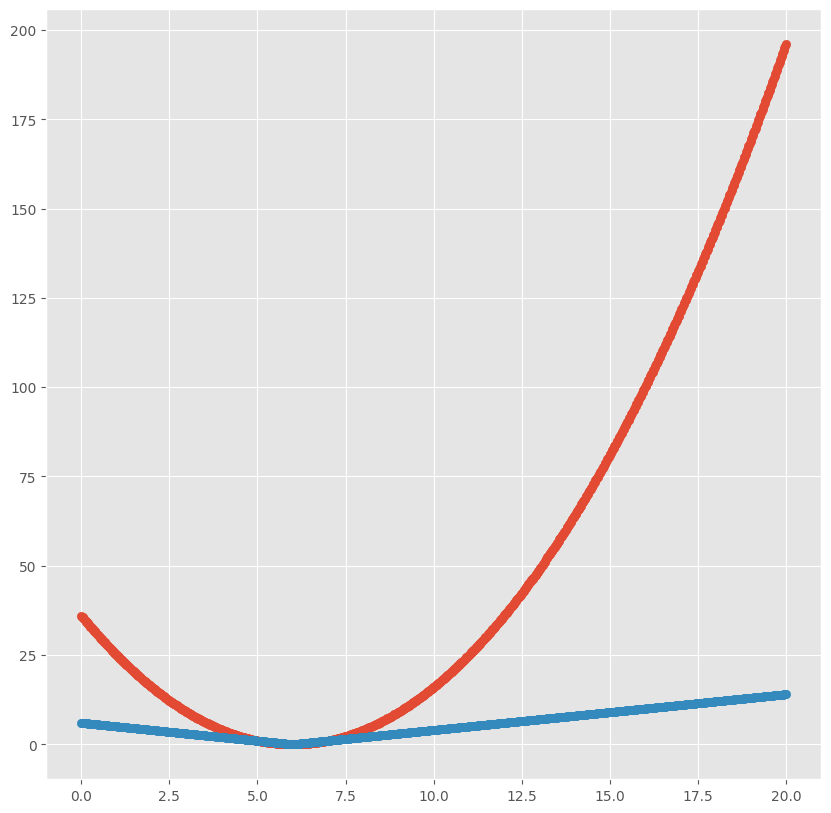

In [13]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))

measurements = np.linspace(0, 20, 1000)
plt.scatter(measurements, (measurements - 6) ** 2, label='Squared Error')
plt.scatter(measurements, abs(measurements - 6), label='Absolute Error')
plt.show()

You can see that the Mean Squared eror is a great penalty, because it punishes getting things too wrong a lot more.

## Standardisation



# Why Standardize? Comparing Apples and Oranges

Imagine you have scores from two different tests:  

- **Test A:** Scores range from 80–100  
- **Test B:** Scores range from 20–80  

A score of **80** is *amazing* in Test B, but only *average* in Test A.  
👉 How can we compare them fairly?

---

### Standardization

This is where **standardization** comes in.  
By converting scores to **Z-scores**, we re-frame them in terms of:

$$
Z = \frac{x - \mu}{\sigma}
$$

where  
- $x$ = value,  
- $\mu$ = mean,  
- $\sigma$ = standard deviation.  

This puts all variables on a **common scale**, allowing for meaningful comparisons.

---

### Interpreting Z-scores

- A **Z-score of +1.5** means the value is *1.5 standard deviations above the mean*.  
- A **Z-score of -0.8** means the value is *0.8 standard deviations below the mean*.  

---

### Why this helps?

Now we can directly compare a student's performance in **Physics** and **Maths**, even if the tests had **different difficulties and score ranges**.


We consider the grades dataset, which contains Physics, Biology and Maths scores for 26 students:

In [22]:
grades = pd.read_csv("https://archive.org/download/ml-fundamentals-data/machine-learning-fundamentals-data/grades.csv")
print(grades.shape)

# Select only numeric columns
grades.select_dtypes(include="number").agg(["mean", "var", "std"])


(26, 4)


,Physics,Biology,Maths
mean,63.769231,67.038462,69.769231
var,517.224615,456.758462,300.664615
std,22.742573,21.371908,17.339683


from matplotlib import pyplot as plt
_df_12['Physics'].plot(kind='hist', bins=20, title='Physics')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Biology'].plot(kind='hist', bins=20, title='Biology')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Maths'].plot(kind='hist', bins=20, title='Maths')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_15.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='Physics', y='Biology', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='Biology', y='Maths', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Physics'].plot(kind='line', figsize=(8, 4), title='Physics')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['Biology'].plot(kind='line', figsize=(8, 4), title='Biology')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_20['Maths'].plot(kind='line', figsize=(8, 4), title='Maths')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='Physics', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='Biology', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='Maths', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

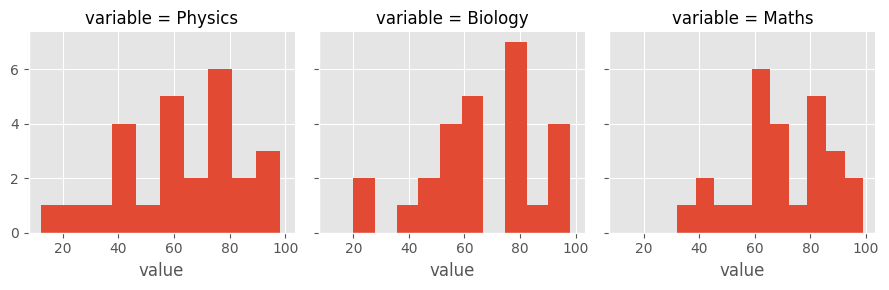

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.FacetGrid(grades.melt("Name"), col="variable")
g.map(plt.hist, "value")

Suppose the instructor wanted to provide the students with an idea of how well they are performing relative to their peers, but not their exact score. This can be done by **standardising** the scores. This is done by subtracting the mean and re-scaling the data to be in units of standard deviations.  

In [25]:
grades["Physics_std"] = (grades["Physics"] - grades["Physics"].mean()) / grades["Physics"].std()

In [26]:
grades.head()

,Name,Physics,Biology,Maths,Physics_std
0,Arnold,80,78,70,0.713673
1,Bob,60,98,45,-0.165735
2,Cassandra,34,56,65,-1.308965
3,Donovan,56,65,32,-0.341616
4,Emily,98,23,55,1.505141


What can we conclude?

Firstly, Arnold and Emily are above average Physics students, whereas Bob, Cassandra and Donovan are below average.

Also, Emily's scores are **1.5 standard deviations above the mean**, whereas Cassandra's scores are **1.3 standard deviations below the mean**.

More importantly, standardisation allows us to compare the results from different exams. Standardisation allows each of the variables to be expressed in common units: their respective standard deviation.

We can do the same for Math scores, which have a lower variance than Physics scores:

In [ ]:
grades["Maths_std"] = (grades["Maths"] - grades["Maths"].mean()) / grades["Maths"].std()
grades.head()

,Name,Physics,Biology,Maths,Physics_std,Maths_std
0,Arnold,80,78,70,0.713673,0.013309
1,Bob,60,98,45,-0.165735,-1.428471
2,Cassandra,34,56,65,-1.308965,-0.275047
3,Donovan,56,65,32,-0.341616,-2.178196
4,Emily,98,23,55,1.505141,-0.851759


What do we observe?

 - While Arnold is doing really well in Physics, he's barely above average in Maths.
 - Bob, Cassandra and Donovan are below average in both Physics and Maths.
 - While Emily seems to be an above average Physics student, she's quite the opposite when it comes to Maths.

# Mathematics of Probability

## Conditional Probability
|Sex/Handedness|Right handed| Left handed|
|--------------|-----------:|-----------:|
|Male          |43          | 9          |
|Female        |44          | 4          |

The contingency table above summarises some fake data collected from 100 respondents on genders and handedness.

**What is the probability that any one respondent in our survey is female?** To calculate the probability, divide the number of events by the sample space: $\frac{44+4}{100}=0.48$. It is a little more likely that our respondents are male than female.

However, what is the probability that a female in our sample is **left-handed**? Quite unlikely. To quantify the likelihood, we could divide the number of left-handed females by the number of females in our sample: $\frac{4}{48}=\frac{1}{12}$.

$\frac{1}{12}$ is a **conditional probability**: a probability under a condition. Note that to calculate the conditional probability, we restrict the sample space under consideration to a condition, and then recalculate the probability as if the condition were the entire sample space.

A general formula for conditional probability is as follows. The conditional probability of A given B is

$$P(A|B)=\frac{P(A\cap B)}{P(B)}$$

We take the joint probability $P(A\cap B)$ and 'inflate' it with the probability of $P(B)$.

Conditional probabilities are fundamental to the idea of **independence**. Recall that we defined independence of two events A and B as

> the probability of event A is not changed by the occurence of event B.

We can restate the definition above as

$$P(A|B)=P(A)$$

Consider whether handedness is independent of sex. The probability of being left-handed is $11/100$, or 0.11. As you might expect, it's close to the conditional probability $P(left$-$handed|female)=0.12$.

## Law of Total Probability

Let $A_1, \dots A_n$ be mutually exclusive and exhaustive events, where $P(A)\neq 0$ for all $A$. Then, the probability of $P(B)$ can be defined as

$$P(B)=\sum^n_{i=1}P(B|A_i)P(A_i)$$

### Example

The probability that any given person in the population has a disease is 0.1. The likelihood of testing positive for a disease if you have it is 0.95. The probability of testing positive in the absence of the disease (a false positive) is 0.10.

What is the probability of testing positive for the disease?

$$P(T = 1|D = 1) = 0.95$$
$$P(T = 1|D = 0) = 0.10$$
$$P(D = 1) = 0.1$$


$$\begin{align}
P(T=1)&=P(T=1|D=1)P(D=1) + P(T=1|D=0)P(D=0)\\
&= 0.95\times 0.1 + 0.10*0.90\\
&=0.14
\end{align}$$

## Bayes' Theorem

### Updating Our Beliefs with Evidence

Bayes' Theorem is one of the most important concepts in probability theory. It provides a mathematical way to update our existing beliefs in light of new evidence. It's the engine behind many machine learning algorithms (like Naive Bayes classifiers) and is a cornerstone of modern statistical inference.

$$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$$

$$Posterior=\frac{Likelihood\times Prior}{Evidence}$$

An informal way of putting Bayes' Theorem:

$$P(pred|data)=\frac{P(data|actual)P(actual)}{P(data)}$$

The proof for Bayes' Theorem follows from the definition of conditional independence. We know that

$$\begin{align}
P(A\cap B)&=P(A|B)\times P(B)\\
&=P(B|A)\times P(A)
\end{align}$$

This can be rearranged to state Bayes's Theorem:

$$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$$


# Key Terms in Bayes' Theorem

- **$P(A)$ (Prior):**  
  Our initial belief about event $A$ before seeing any new data.  

- **$P(B \mid A)$ (Likelihood):**  
  The probability of seeing the data $B$, given that our hypothesis $A$ is true.  

- **$P(B)$ (Evidence):**  
  The total probability of observing the data $B$ under all possible hypotheses.  

- **$P(A \mid B)$ (Posterior):**  
  Our updated belief about $A$ after we have seen the data $B$.  


**Example 1**

You want to go for a picnic today but it is cloudy in the morning. From experience, you know that:

- the probability of raining on any given day is 10%,
- the probability that it is cloudy on any given day is 40%, and
- 50% of all rainy days start off cloudy.

What is the probability of raining given that it is cloudy?

$P(Rain | Cloud) = \frac {P(Cloud | rain) \times P(rain)}{P(Cloud}=\frac{0.5\times 0.1}{0.4}=0.125$


**Example 2**

The probability that any given person in the population has a disease is 0.1. The likelihood of testing positive for a disease if you have it is 0.95. The probability of testing positive in the absence of the disease (a false positive) is 0.10.

If you have been tested positive for a disease. What is the probability that you actually have the disease?

What is the probability of actually getting the disease given tested positive?

$$P(T = 1|D = 1) = 0.95$$
$$P(T = 1|D = 0) = 0.10$$
$$P(D = 1) = 0.1$$

As we've done earlier, we can use the law of total probability to find $P(T=1)$:

$$\begin{align}
P(T=1)&=P(T=1|D=1)P(D=1) + P(T=1|D=0)P(D=0)\\
&= 0.95\times 0.1 + 0.10*0.90\\
&=0.14\end{align}$$

Note that $$P(T = 1|D = 1) = 0.95$$ is the likelihood and $$P(D = 1) = 0.1$$ is the prior.


$\begin{align}
P(D=1|T=1)&=\frac{P(T=1|D=1)P(D=1)}{P(T=1)}\\
&=\frac{0.95\times 0.1}{0.14}\\
&=0.68
\end{align}$

### The Surprising Result

The result of Example 2 is often shocking: even though you tested positive with a 95% accurate test, there's only a 68% chance you actually have the disease!

**Why?**

Because the prior probability of having the disease was so low (10%). The large number of healthy people getting false positives creates a significant pool of "positive tests" that don't come from sick individuals. This highlights how crucial it is to consider the base rate (prior) when interpreting new evidence.

# What is a Random Variable?

In mathematics, a variable like $x$ can hold a value.  
A **random variable** is similar, but its value is the **numerical outcome of a random phenomenon**.  

We don't know what its value will be until we run the experiment,  
but we *can* know the probability of its possible values.

---

### Example

Think of it as a **bridge** between the outcomes of an experiment and a number.  

For a coin toss, we could define a random variable $X$ as:

- $X = 1$ if the coin is **Heads**  
- $X = 0$ if the coin is **Tails**  

---

There are two main types of random variables:


- A **continuous random variable** takes on infinitely many values/real numbers. In fact, the probability of a continuous random variable taking on any one value is 0.
- A **discrete random variable** takes on a finite set of values, e.g. counts.


### Continuous Random Variable

- **Definition:** Can take on any value within a given range.  
- **Examples:**  
  - A person's exact height  
  - The temperature of a room  
  - The time it takes to run a race  

---

### Key Idea

Because there are **infinitely many possible values**, the probability of the variable being *exactly one specific value* (e.g., height = 175.12345... cm) is:

$$
P(X = x) = 0
$$

Instead, we measure the probability of it falling **within a range** (e.g., height between 175 cm and 176 cm).


### Discrete Random Variable

- **Definition:** Can only take on specific, **countable values**.  

- **Examples:**  
  - The result of a dice roll (1, 2, 3, 4, 5, or 6)  
  - The number of heads in 5 coin flips (0, 1, 2, 3, 4, or 5)  
  - The number of customers that enter a store in an hour  


## Probability Distributions
A random variable is a variable whose possible values are the outcomes of a non-deterministic process.

### What is a Probability Distribution?

A **probability distribution** is a function or a table that describes all the possible values a random variable can take and their corresponding probabilities.  
It’s like a **"blueprint"** for a random variable.  

- **For discrete random variables:**  
  - Called a **Probability Mass Function (PMF)**  
  - Tells you the exact probability for each specific value.  
  - Example: \( P(X = k) \)  

- **For continuous random variables:**  
  - Called a **Probability Density Function (PDF)**  
  - Describes the likelihood of the variable falling within a range.  
  - The **area under the PDF curve** for a given range is the probability.  


### Binomial distribution

We start with the **binomial distribution**. The binomial distribution models the probability of $k$ successes in $n$ independent trials.

### When to Use the Binomial Distribution  

The **Binomial distribution** is your tool of choice when your experiment meets the following four conditions:  

1. **Fixed number of trials (n):**  
   You are repeating the experiment a set number of times.  
   *Example: flipping a coin 10 times.*  

2. **Independent trials:**  
   The outcome of one trial does not affect the others.  
   *Example: the first coin flip doesn't change the second.*  

3. **Only two outcomes:**  
   Each trial has only two possible outcomes, which we label **"success"** and **"failure."**  
   *Example: Heads vs. Tails, Win vs. Lose.*  

4. **Constant probability (p):**  
   The probability of "success" is the same for every trial.  
   *Example: the probability of Heads is always 0.5.*  

👉 We are interested in the probability of getting **exactly \(k\) successes**.  

Let's redo the lecture example with `scipy`. Import the `binom` class from `scipy.stats`:

In [31]:
from scipy.stats import binom

If the chance of winning a game is 0.75, what is the probability of losing all 5 games?

Assume the chance of winning each game is independent. Then we can solve this problem using the binomial distribution.

### Translating the Question

**"Losing all 5 games"** ≡ **"having 0 wins in 5 games."**

---

#### Case 1: Define "success" = Winning a game  
- \( n = 5 \)  
- \( p = 0.75 \)  
- \( k = 0 \)

$$
P(X=0) = \binom{5}{0}(0.75)^0(0.25)^5
$$

---

#### Case 2: Define "success" = Losing a game  
- \( n = 5 \)  
- \( p = 0.25 \)  
- \( k = 5 \)

$$
P(X=5) = \binom{5}{5}(0.25)^5(0.75)^0
$$

---

✅ Both reduce to:

$$
P(\text{lose all 5}) = (0.25)^5 = \frac{1}{1024} \approx 0.0009765625
$$



We use the `.pmf` method of the `binom` class. `pmf` stands for **probability mass function**: a function that states the probability that a discrete random variable is equal to any one value.

In [32]:
binom.pmf(k=5, n=5, p=0.25)

np.float64(0.0009765625)

The answer is what we should expect. If we win 3 in 4 games, it's unlikely we lose 5 in 5 games.

Now, suppose we want to know what is the probability of winning 3 games or less. We want to find $P(X \leq 3)$.

Note $P(X \leq 3) = P(X=0)+ P(X=1)+P(X=2)+P(X=3)$.

By the **complement rule**, $P(X \leq 3) = 1 - P(X=5)-P(X=4)$.



In [33]:
1 - binom.pmf(k=4, n=5, p=0.75) - binom.pmf(k=5, n=5, p=0.75)

np.float64(0.3671875)

Note that we could also answer this by referring to the value of the **cumulative density function** at $X=3$.

The cumulative density function, $F(x)$, is defined as

$$F(x)=P(X\leq x)$$

In [ ]:
binom.cdf(3, n=5, p=0.75)

np.float64(0.3671875)

### Cumulative Distribution Function (CDF)

The **cumulative distribution function (CDF)**, denoted as \( F(x) \), is defined as:

$$
F(x) = P(X \leq x)
$$

---

🔹 **Intuition**:  
The CDF gives the probability that the random variable \( X \) takes a value **less than or equal to** \( x \).

---

🔹 **Shortcut property**:  
Instead of computing the PMF (Probability Mass Function) for multiple values and summing them:

$$
P(X \leq 3) = P(X=0) + P(X=1) + P(X=2) + P(X=3)
$$

the **CDF** does it in one step:

$$
F(3) = P(X \leq 3)
$$

So in Python/Colab you can directly use `.cdf()` to get this cumulative probability instead of adding up individual `.pmf()` values.


### Normal distribution

We move on to the **normal distribution**. There are some key properties that are important to know about this distribution:

- The mean, median and mode of the distribution is the same.
- The curve is bell-shaped.
- The total area under the curve is 1.
- Symmetric about the mean.

There are two key **shape parameters** that define the location and spread of the normal distribution: the mean, commonly denoted as $\mu$; and the standard deviation, commonly denoted as $\sigma$.

**Mean ($\mu$):**  
This parameter controls the center of the bell curve. Shifting the mean moves the entire curve left or right along the x-axis.  

**Standard Deviation ($\sigma$):**  
This parameter controls the spread or width of the bell curve.  
- A small $\sigma$ results in a tall, narrow curve, meaning the data is tightly clustered around the mean.  
- A large $\sigma$ results in a short, wide curve, meaning the data is more spread out.  


Again, start by importing the `norm` class from `scipy.stats`:

In [34]:
from scipy.stats import norm

#### Standard normal distribution

A normally distributed random variable with mean 0 and standard deviation 1 is said to follow the standard normal distribution, also known as the **z-distribution**.

The Standard Normal Distribution is a special, "reference" version of the normal distribution. It's incredibly useful because we can convert any normal distribution into this standard form.

A normally distributed random variable can be converted into the standard normal distribution by standardisation:

$$Z = \frac{X-\mu}{\sigma}$$

This formula calculates the **Z-score**.
It tells us exactly how many standard deviations a value $X$ is away from its mean $\mu$.




<div class="alert alert-info">
    <b>Note:</b> The <code>.pdf</code> method refers to the <b>probability density function</b>, which is the counterpart of the probability mass function for continuous random variables.
</div>

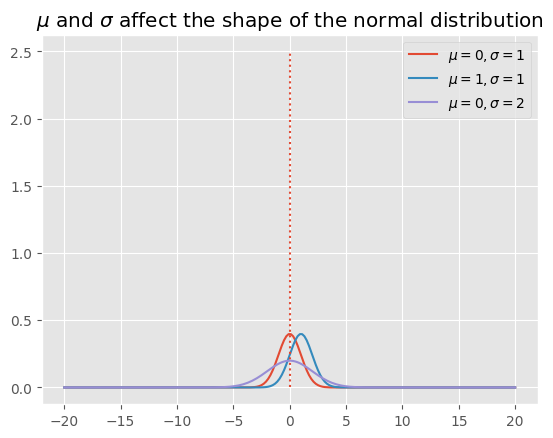

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.linspace(-20, 20, 200)
f1 = norm.pdf(x, loc=0, scale=1)
f2 = norm.pdf(x, loc=1, scale=1)
f3 = norm.pdf(x, loc=0, scale=2)

plt.plot(x, f1, label=r"$\mu=0, \sigma=1$")
plt.plot(x, f2, label=r"$\mu=1, \sigma=1$")
plt.plot(x, f3, label=r"$\mu=0, \sigma=2$")
plt.vlines(x=0, ymin=0, ymax=2.5, linestyles="dotted")

plt.legend()
plt.title(r"$\mu$ and $\sigma$ affect the shape of the normal distribution")
plt.show()


With continuous distributions, we do not want to find the probability of a random variable at any given value. Since the range is infinite, the probability that a continuous random variable takes on any given value is zero.

We are usually interested in finding out the probability that the random variable lies between two values.



#### Programmatic solutions: percent point function

Recall the definition of the **cumulative density function**:

$$F(x)=P(X\leq x)$$

The CDF returns the probability that a random variable is less than $x$. For instance, because of the symmetric shape of the normal distribution, the CDF of the standard normal distribution at 0 is expected to be 0.5.

In [36]:
norm.cdf(0)

np.float64(0.5)

Visually, `norm.cdf(0)` calculates the total area under the **standard normal curve** to the left of $x = 0$.  

Since the curve is perfectly symmetric, this area is exactly half of the total area of $1$:  

$$ P(X \leq 0) = 0.5 $$


We will also use the **percent point function**, available via the `ppf()` method. The percent point function does the inverse of the cumulative density function. It returns the percent point given the value of the CDF.

The **Percent Point Function (PPF)** is the reverse of the CDF.  

- **CDF**: $F(x) = P(X \leq x)$  
  → "Given a value $x$, what is the total probability to the left of it?"  

- **PPF**: $F^{-1}(p) = x$  
  → "Given a probability $p$, what is the value $x$ that has exactly that much probability to its left?"




In [37]:
norm.ppf(0.5)

np.float64(0.0)

#### Standard deviation rule/empirical rule

A useful rule of thumb is the **standard deviation rule**, or empirical rule.

This rule states that for a normally distributed random variable,
- 68% of data lies within 1 standard deviation of the mean.
- 95% of data lies within 2 standard deviations of the mean, and
- 99.7% of data lies within 3 standard deviations of the mean.

This rule is a fantastic mental shortcut for quickly understanding the spread of normally distributed data without needing a calculator.

#### Example: height

Maalysian males' heights are normally distributed with mean 169.57 and standard deviation 7.57. Answer the following questions programmatically and using the empirical rule.

- 84% of Malaysians have height of less than ... cm.

### Thinking with the Empirical Rule

We know that **68%** of the data in a normal distribution lies within **1 standard deviation** of the mean.  
That is:  

- From $(\mu - \sigma)$ to $(\mu + \sigma)$ → $68\%$ of the data.  

Because the normal distribution is symmetric:  
- Half of this $68\%$ lies above the mean.  
- So, $68\% / 2 = 34\%$ lies between $\mu$ and $\mu + \sigma$.  

Now, since **50%** of the data is always below the mean:  

$P(X \leq \mu + \sigma) = 50\% + 34\% = 84\%$



In [40]:
norm.ppf(0.24, loc=145.57, scale=12.57)

np.float64(136.6917767851001)

In [42]:
145.57 + 12.57

158.14

- The tallest 2.5% of Malaysians are taller than ... cm

**Thinking with the Empirical Rule:**  
If 95% of data is within $2\sigma$, then $5\%$ is outside ($2.5\%$ in the left tail, $2.5\%$ in the right tail).  
So, the tallest $2.5\%$ are above $\mu + 2\sigma$.  

**Programmatic solution:**  
We’re looking for the point where $97.5\%$ of the data is to the left:

In [44]:
norm.ppf(0.24, loc=145.57, scale=12.57)

np.float64(136.6917767851001)

In [45]:
145.57 + 2 * 12.57

170.70999999999998

- The shortest 0.15% of Malaysians are shorter than ... cm

**Thinking with the Empirical Rule:**  
If $99.7\%$ of data is within $3\sigma$, then $0.3\%$ is outside ($0.15\%$ in each tail).  
So, the shortest $0.15\%$ are below $\mu - 3\sigma$.  

**Programmatic solution:**  
We’re looking for the point where $0.15\%$ of the data is to the left:

In [47]:
norm.ppf(0.24, loc=145.57, scale=12.57)

np.float64(136.6917767851001)

In [48]:
145.57 - 3 * 12.57

107.85999999999999

### Poisson distribution

The Poisson distribution models the number of events that occur in a fixed time interval.

Use the Poisson distribution when:
- events occur at random points of time and space, and
- our interest lies is the number of occurrences of the event.

The most important property of the Poisson variable is that the waiting time between events is **memoryless**:
- the time when events occur do not affect the number of successes in an interval;  
- only the length of time affects the number of successes.

Intuition for "Memoryless": Imagine you are waiting for a bus that arrives, on average, every 10 minutes (following a Poisson process). You have already been waiting for 5 minutes. The "memoryless" property means that your expected waiting time for the next 5 minutes is still 10 minutes. The process doesn't "remember" that you've already been waiting. The probability of a bus arriving in the next minute is independent of the past.

The Poisson distribution has a single parameter: lambda ($\lambda$). The mean and variance of the Poisson distribution coincides with the shape parameter $\lambda$.

### Lambda ( $\lambda$ )

This is the key parameter of the **Poisson distribution**.  
It represents the **average rate of events** in the given interval.  

- Example:  
  If a call center receives an average of $10$ calls per hour, then  

  $\lambda = 10$


The probability mass function of the Poisson distribution is as follows:

$$p(X=k) = \frac{e^{-\lambda}\lambda^{k}}{k!}$$

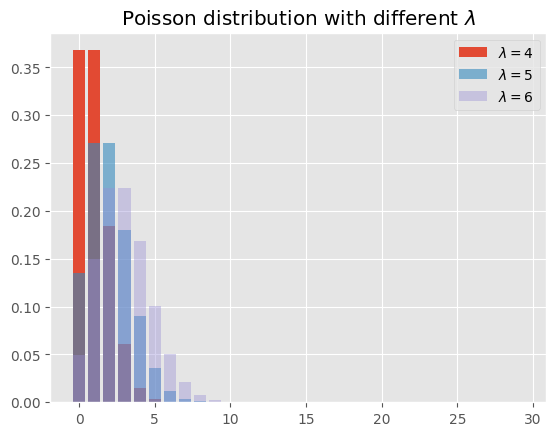

In [49]:
# a Poisson distribution with lambda=1 can be interpreted as:
# on average, 1 event occurs within the set time interval.
# naturally, it is less likely that more than 1 event occurs.

from scipy.stats import poisson

# Poisson distribution with different λ values
x = np.arange(30)
f1 = poisson.pmf(x, mu=1)
f2 = poisson.pmf(x, mu=2)
f3 = poisson.pmf(x, mu=3)

plt.bar(x, f1, label=r"$\lambda=4$")
plt.bar(x, f2, label=r"$\lambda=5$", alpha=0.6)
plt.bar(x, f3, label=r"$\lambda=6$", alpha=0.4)

plt.legend()
plt.title(r"Poisson distribution with different $\lambda$")
plt.show()

In [ ]:
# the average can be calculated by multiplying the inputs with the values of the PMF
x @ f1
# see that this is equal to lambda

np.float64(0.999998874797402)

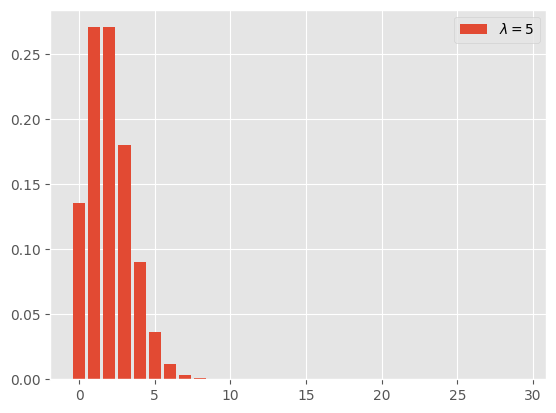

In [50]:
# for lambda=2, having 2 events is a lot more likely

plt.bar(x, f2, label=r"$\lambda=5$")
plt.legend()

In [ ]:
x @ f2

np.float64(1.999525105343477)

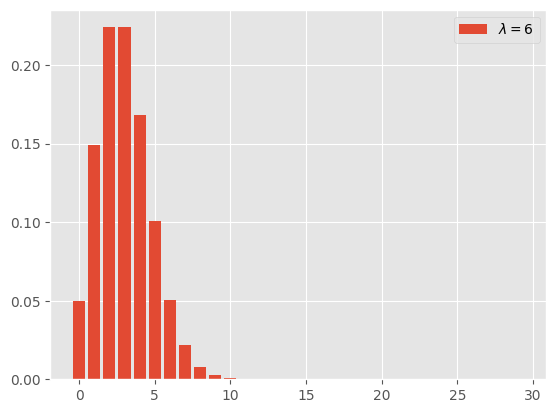

In [51]:
plt.bar(x, f3, label=r"$\lambda=6$")
plt.legend()

In [ ]:
x @ f3

np.float64(2.9885910238149727)

**Example**: Suppose emergency calls per hour follow a Poisson distribution and occur at a rate of 5 calls per hour. What is the probability of receiving 3 calls in any given hour?

In [ ]:
poisson.pmf(3, 5)

np.float64(0.1403738958142805)

## Central Limit Theorem

The Central Limit Theorem helps us reason about realisations of sample means.

Specifically, it tells us that in many repeated samples, the distribution of the sample means of a random variable is normal regardless of the underlying population distribution.

## 📊 The Most Important Theorem in Statistics

### The Central Limit Theorem (CLT)

The **Central Limit Theorem** is arguably the most fundamental concept in statistics.  

**Stated simply:**

No matter what the original population's distribution looks like (it could be **uniform, skewed, or random**), the **distribution of the means of samples** taken from that population will **tend to be a normal distribution**, especially as the **sample size increases**.

---

### 🔎 Example with Code Thinking

1. Start with a population that follows a **Poisson distribution** with $\lambda = 3$.  
   - This distribution is **skewed**, not a nice bell curve.

2. Take a **random sample of 20** from this population and calculate its **mean**.

3. Repeat step 2 **400 times**, collecting the mean from each sample.

4. Plot a **histogram** of all these collected sample means.

---

### 🎯 The Result

The histogram of sample means will look like a **normal distribution**,  
even though the **original population was not normal!**



In [ ]:
from scipy.stats import poisson

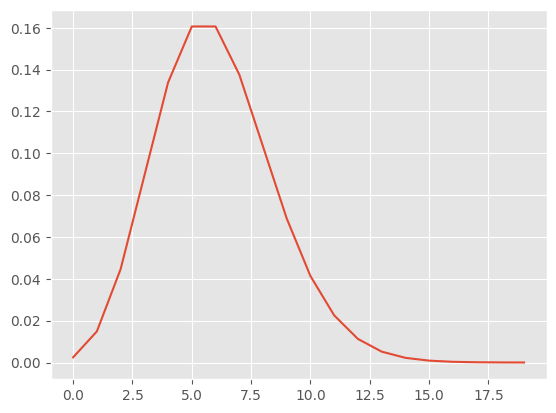

In [52]:
bins = np.arange(0, 20)
p_pois = poisson.pmf(bins, mu=6)
plt.plot(bins, p_pois)

(array([ 14.,  49., 104., 167., 175., 165.,  86.,  27.,  10.,   3.]),
 array([4.  , 4.46, 4.92, 5.38, 5.84, 6.3 , 6.76, 7.22, 7.68, 8.14, 8.6 ]),
 <BarContainer object of 10 artists>)

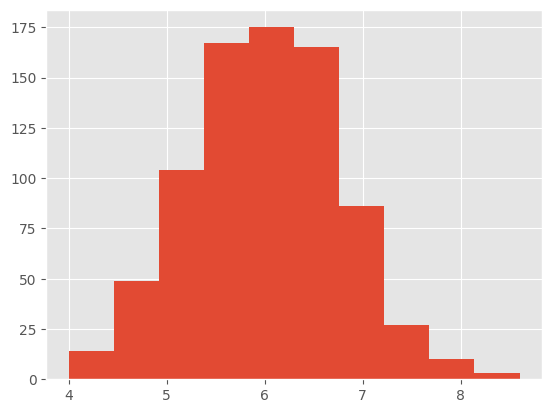

In [53]:
def sample_pois(_):
    samples = poisson.rvs(mu=6, size=10)
    return np.mean(samples)

means = list(map(sample_pois, np.arange(800)))
plt.hist(means)

# Using Normal Distribution in Weight Initialization

**Normal Distribution** could be very helpful when it comes to weight initialization of deep learning task.

## A Practical Application in Deep Learning

Now let's see how these statistical concepts are critical in a modern field like deep learning.  
One of the key challenges in training deep neural networks is ensuring that information can flow smoothly through many layers of computation.


In deep neural network, we may encounter **vanishing/exploding gradients** when the derivaties become very small or very big. The activations and derivatives will be decreased/increased exponentially as a function of number of layers. This will make training difficult, especially when gradients are exponentially smaller, then gradient descent wiill take tiny little steps. Consequently it will take a long time for gradient descent to learn anything.

Therefore, using a normal distributed weight initiallization with mean equals to 0 and a standard deviation of 1 could be helpful in resolving the issue.

### The Solution: Smart Initialization

The problem arises from how we set the initial **weights** (the parameters the network learns).  
- If they are too small, the signal dies out (*vanishes*).  
- If they are too large, the signal grows uncontrollably (*explodes*).  

The solution is to initialize the weights *just right*.  
A very effective technique is to draw the initial weights from a **Normal Distribution** with:  
- Mean = 0  
- A very specific standard deviation (depending on the size of the previous layer in the network)  


For example, when we using ReLU as our activation function, we would do the following steps:

- Generate random sample of weights from a Normal Distribution having mean equals 0 and a standard deviation of 1.
- Multiply the sample with $\sqrt{(\frac{2}{n_i})}$, where $n_i$ is number of input units for that layer.

```np.random.rand(shape) * np.sqrt(2/n[l-1])```, where `l` is the total number of input units.

> This initialization is also called **Xavier Initialization** or **He Initialization**.

This sort of initialization helps to set the weight matrix neither too bigger than 1, nor too smaller than 1. Thus it doesn’t explode or vanish gradients respectively.

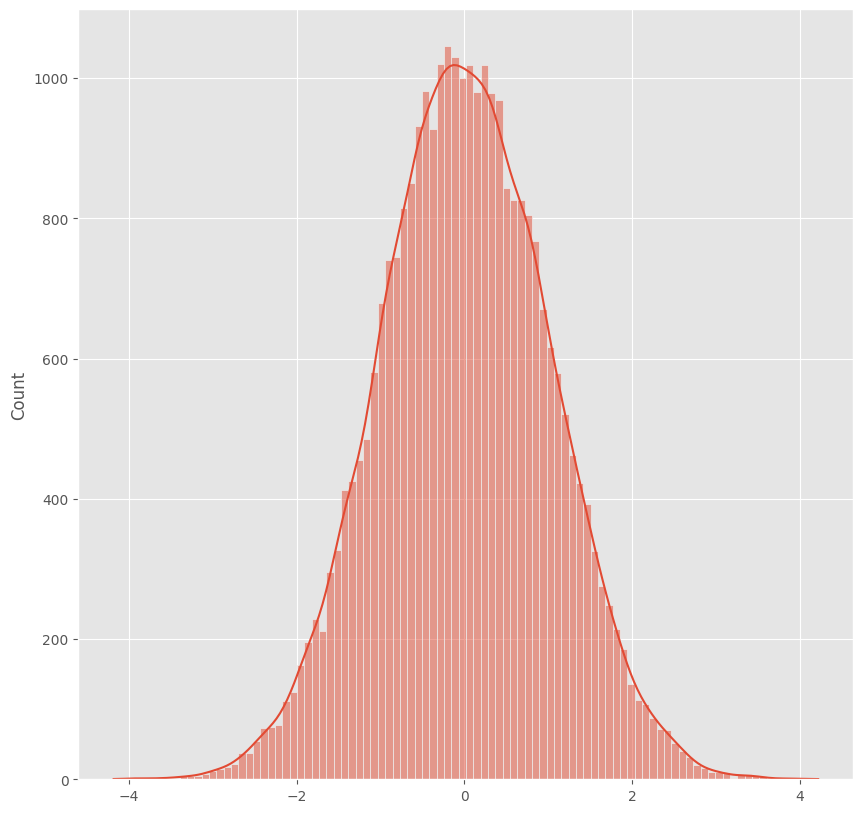

In [54]:
import seaborn as sns
plt.figure(figsize=(10, 10))
x = np.random.normal(size=(30000))
sns.histplot(x, kde=True)
plt.show()

# Entropy (Optional)

Now we define a quantity called entropy, which essentially means how much information is conveyed by probability.

### Entropy: A Measure of Surprise or Uncertainty

In simple terms, **entropy** is a measure of randomness or unpredictability.  
It's a way to quantify *"how much surprise"* is in an event.  
The more uncertain or random an event is, the higher its entropy.

- **Low Entropy:** A predictable system.  
  Example: A biased coin that lands on heads 99.9% of the time.  
  The outcome is almost certain. Observing "heads" gives very little new information since you already expected it.  
  → This system has **low entropy**.

- **High Entropy:** An unpredictable system.  
  Example: A fair coin.  
  You have no idea whether it will be heads or tails. The uncertainty means the outcome provides the maximum amount of new information (**1 bit of information**).  
  → This system has **high entropy**.


## A solid-liquid-gas example

When no probability is involved, i.e. everything is known before hand, no information is gained from the experiment. All the results of the experiment could be predetermined. Look at the images below, which represent the molecules of a solid, which have low to no entropy (perfectly ordered crystal).

The state of molecules in a substance is a great physical analogy for **entropy**.

- **Solid (Low Entropy):**  
  The molecules are locked in a fixed, orderly crystal lattice.  
  Their positions are highly predictable. There is very little randomness or surprise.


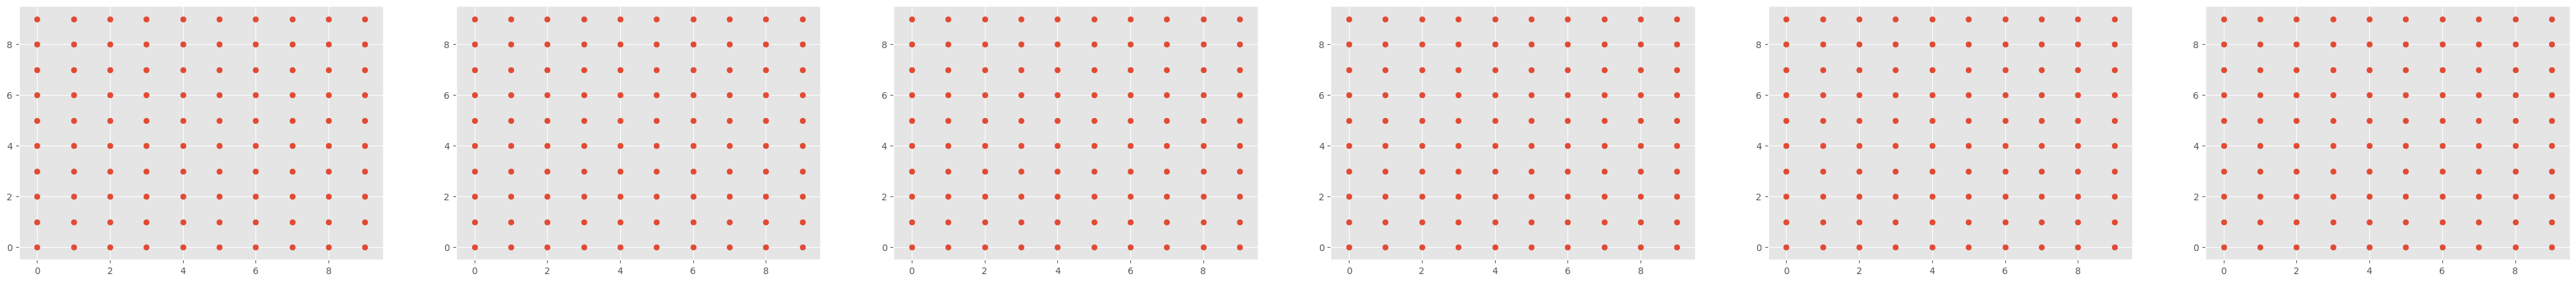

In [55]:
fix, axs = plt.subplots(1, 6, figsize=(50, 5))

for ax in axs:
    x, y = np.meshgrid(np.arange(10), np.arange(10))
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()

Now that we have probability in the game, we can visualize the same for say gases, when we draw the samples from a probability distribution that is uniform, a lot of information is conveyed.

- **Gas (High Entropy):**  
  The molecules are moving randomly and are spread out uniformly throughout their container.  
  Their positions are highly unpredictable. Knowing the position of one molecule tells you nothing about the others.  
  This is a **high entropy system**.


AttributeError: 'numpy.ndarray' object has no attribute 'scatter'

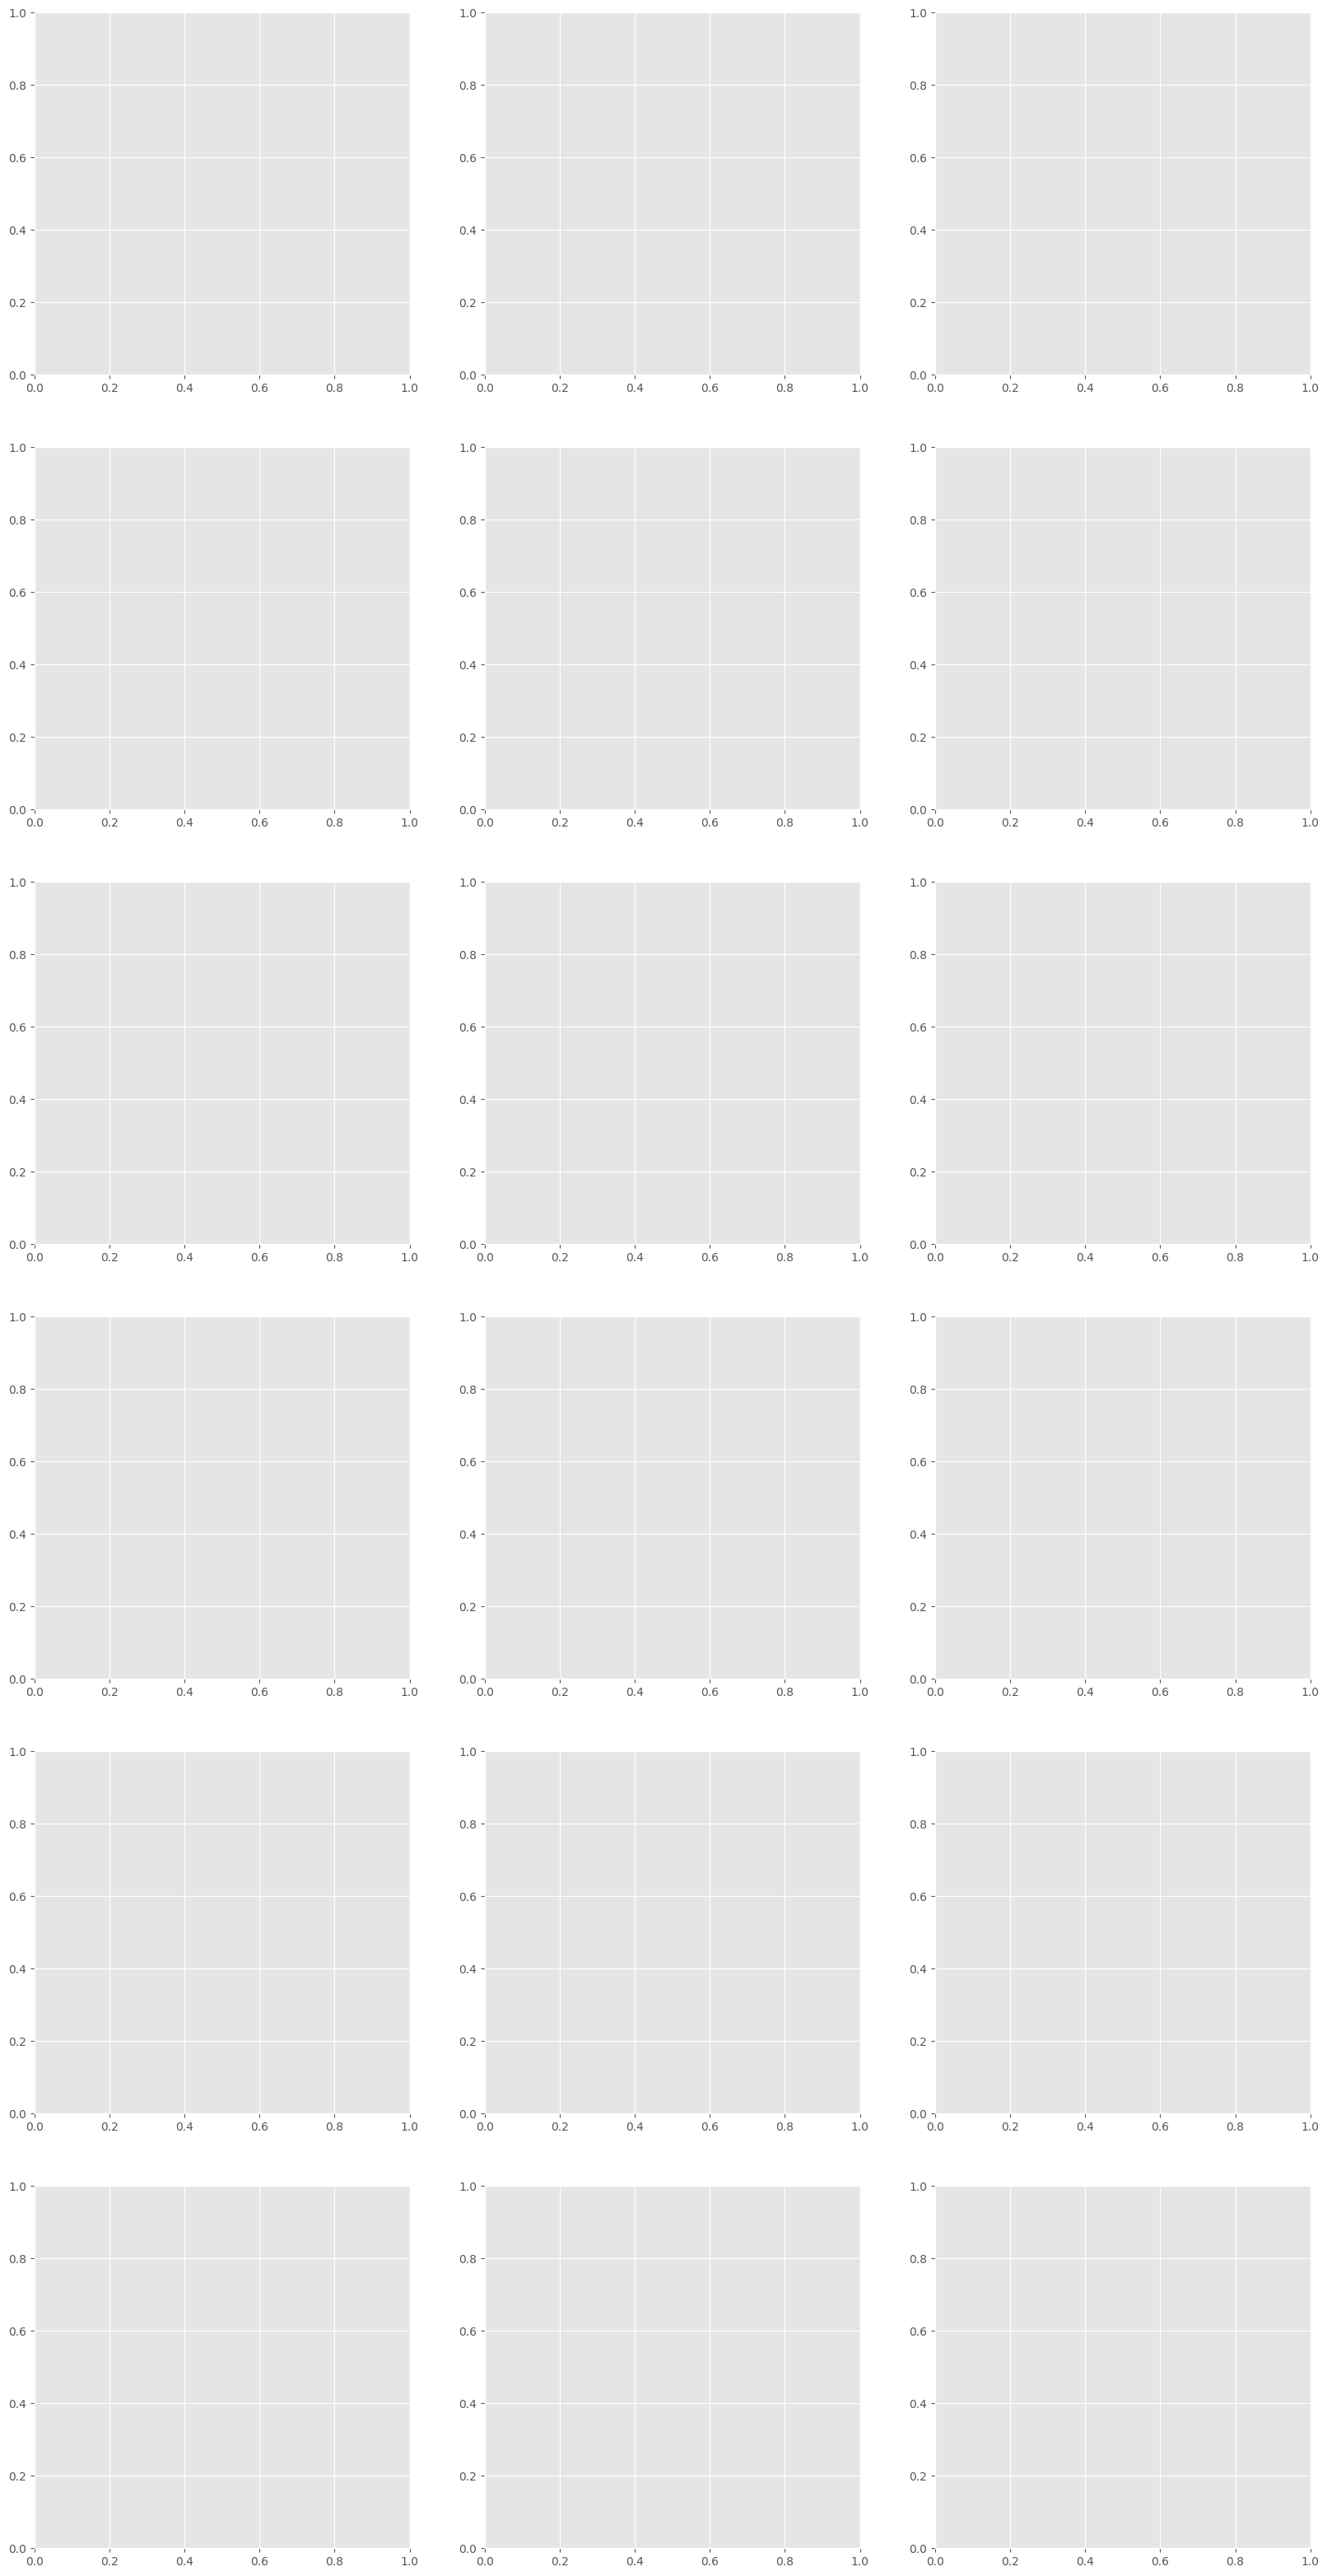

In [56]:
fix, axs = plt.subplots(6, 3, figsize=(20, 40))

for ax in axs:
    x, y = np.random.random(100) * 9, np.random.random(100) * 9
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()

And if there is some randomness, but not complete, then less information is gained, and it has less entropy.

- **Liquid (Medium Entropy):**  
  The molecules are not fixed but are still clustered together due to intermolecular forces.  
  Their positions have some randomness (drawn from a Normal distribution in this simulation), but they are not completely unpredictable.  
  This represents a state of **medium entropy** — more surprise than a solid, but less than a gas.


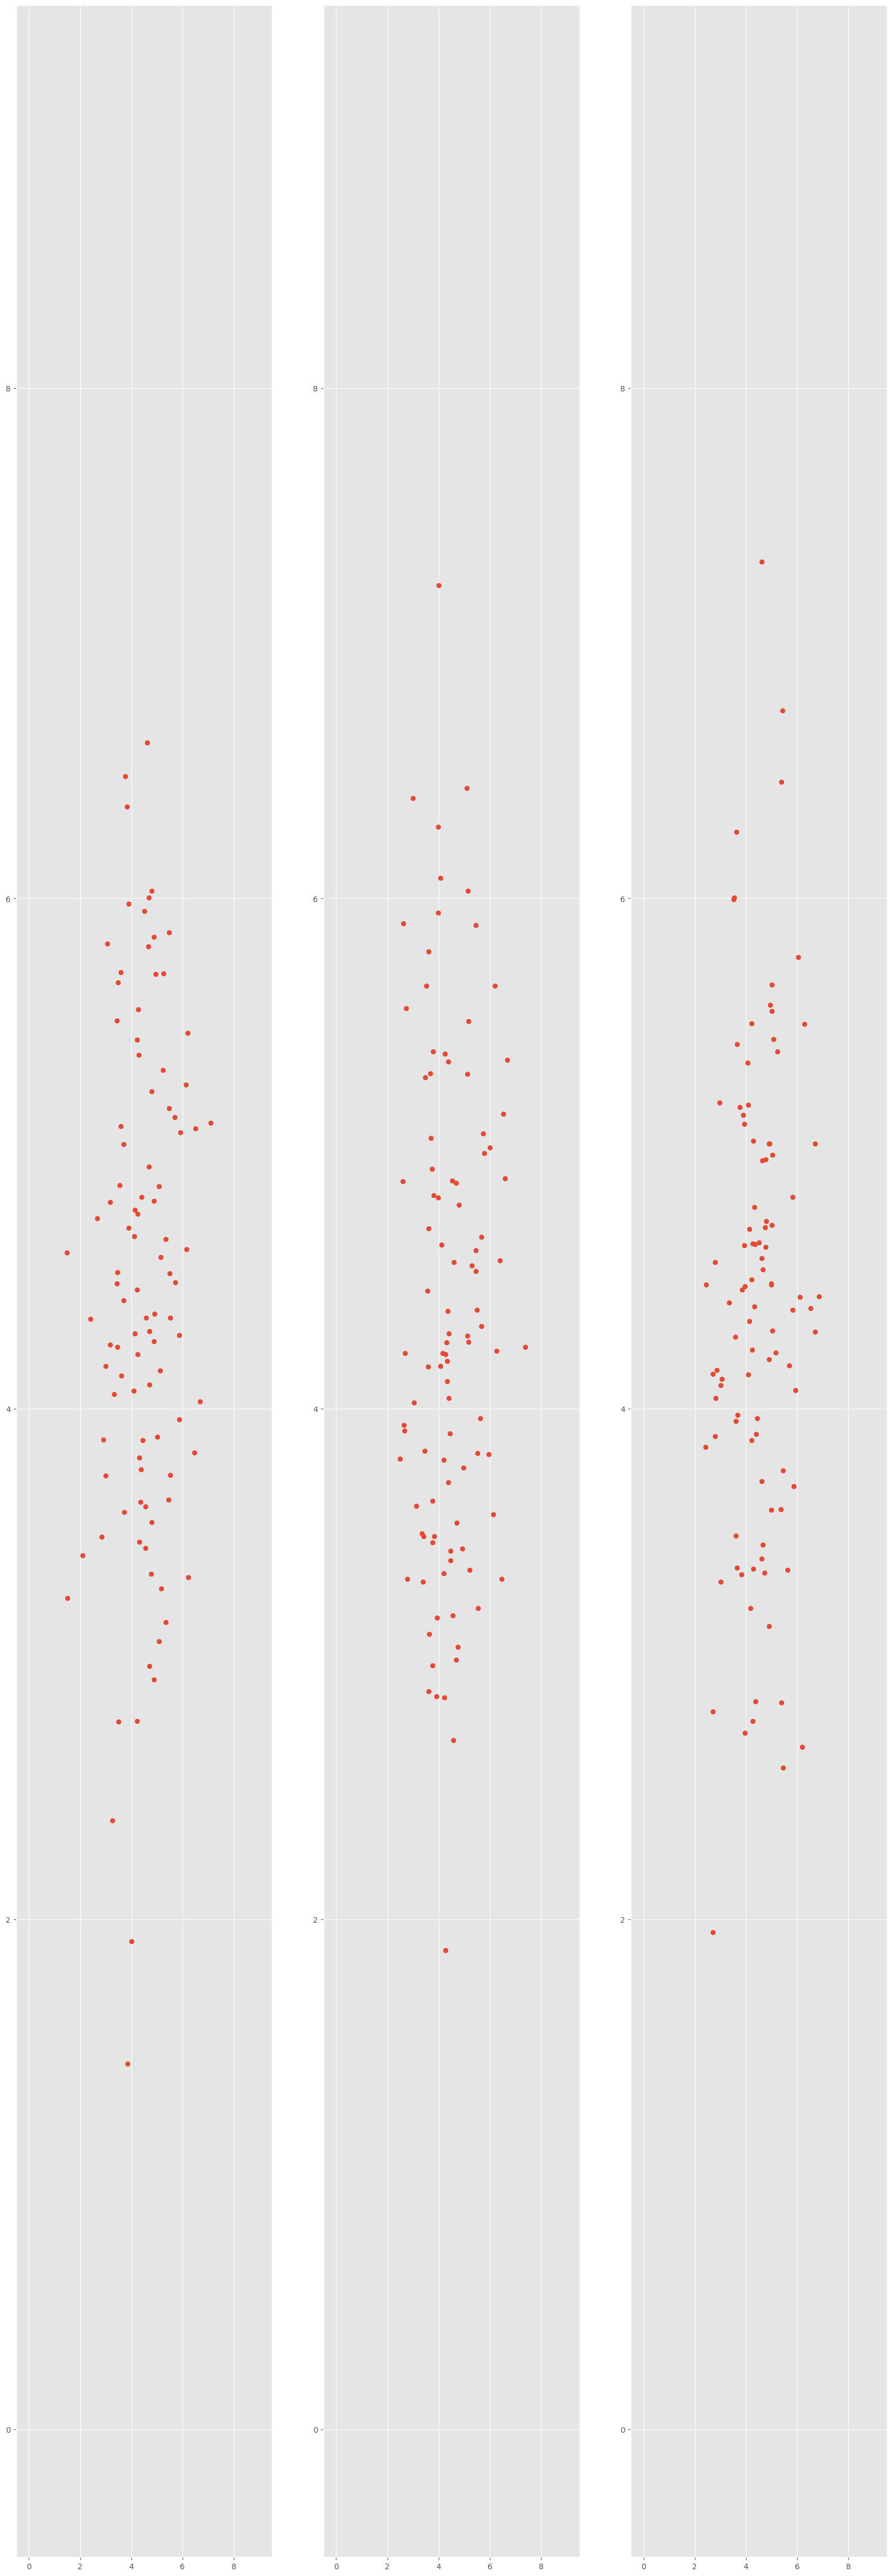

In [57]:
fix, axs = plt.subplots(1, 3, figsize=(20, 59))

for ax in axs:
    x, y = np.random.normal(loc=4.5, scale=1.0, size=100), np.random.normal(loc=4.5, scale=1.0, size=100)
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()

## So how to define Entropy?

Entropy is defined as the shortest expected length sequence that can contain the information of one experiment.

$$\text{Entropy} = -\sum_i \log(P_i) $$

### The Mathematical Definition of Entropy

In information theory, **entropy** (often denoted as $H$) is calculated for a random variable $X$ with a set of possible outcomes $\{x_1, x_2, \dots, x_n\}$ and their probabilities $\{P(x_1), P(x_2), \dots, P(x_n)\}$.  

The formula is:

$$
H(X) = - \sum_{i=1}^{n} P(x_i) \log_2 \big(P(x_i)\big)
$$

- The unit of entropy is **bits**.  
- The term $\log_2(P(x_i))$ can be thought of as the "*amount of surprise*" for a single outcome $x_i$.  
  - Rare events (low $P(x_i)$) have a large surprise value.  
  - Common events (high $P(x_i)$) have a small surprise value.  
- Entropy is the **expected value** (or weighted average) of the surprise across all possible outcomes.  
  It tells us the **average amount of information** we get from one observation of the random variable.


Here is an example of a tree that tries to actually show this bound, called the Huffman tree. The more frequent letters like A have the shortest code, just call it 0, and the less frequent ones have longer code. We can show that to minimize the expected length of the code, that is the probability of the code times the length of the code averaged over all letters, the best result we can get is the bound shown above.

### Application: Data Compression and Huffman Coding

So, what is entropy useful for?  
In computer science, it provides the **theoretical limit for data compression**.  
- The more unpredictable (high entropy) a piece of data is, the harder it is to compress.

A brilliant algorithm that leverages this is **Huffman Coding**.  
- It creates an **optimal method for encoding data** by assigning **shorter binary codes** to more frequent symbols and **longer codes** to less frequent ones.  
- The goal is to **minimize the average code length**, and the theoretical best-case average is given by the **data's entropy**.

The image below shows a **Huffman tree** built for a set of characters.


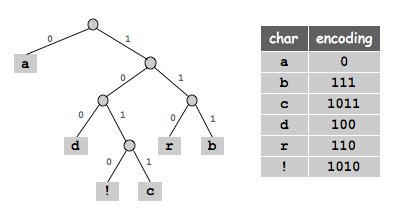

### How to Read the Huffman Tree

To find the binary code for any character, start at the top (**the root**) and trace the path down to the character's gray box:  
- **Left turn = 0**  
- **Right turn = 1**  

**Examples:**  
- `'a'`: From the root, take **one left branch** → code is `0`  
- `'d'`: From the root, go **Right → Left → Left** → code is `100`  
- `'r'`: From the root, go **Right → Right → Left** → code is `110`  
- `'c'`: From the root, go **Right → Left → Right → Right** → code is `1011`  

Notice how this perfectly matches the encoding table on the right.  
- The character `'a'`, which is most frequent, has the **shortest possible code** (1 bit).  
- Infrequent characters like `'c'` and `'!'` are deeper in the tree and receive **longer codes** (4 bits).  

This is exactly how file compression formats like **.zip** work to save space.
